In [1]:
from image_adjust import semantic_transform, non_semantic_transform
from bot_interface import prompt_InstructBlip
from response_compare import pairwise_diff
from transformers import InstructBlipForConditionalGeneration, InstructBlipProcessor
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import numpy as np

/home/fieldaj1/.conda/envs/thesis/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name = "Salesforce/instructblip-flan-t5-xl"
model = InstructBlipForConditionalGeneration.from_pretrained(model_name)
processor = InstructBlipProcessor.from_pretrained(model_name)

Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


# Image Preparation

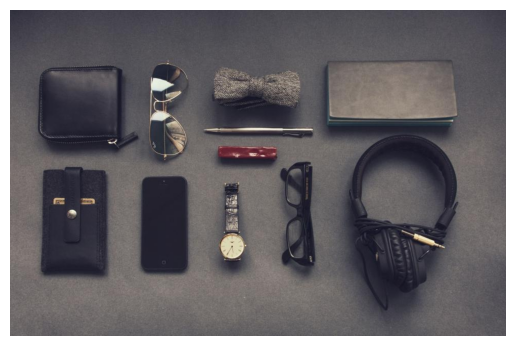

In [3]:
img_path = '/home/fieldaj1/thesis/data/dummy/items.jpg'
img = cv2.imread(img_path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [4]:
sem_tfs = semantic_transform(img_path)
sem_paths = []
for i, img in enumerate(sem_tfs):
    path = f"../data/sem{i}.jpg"
    cv2.imwrite(path, img)
    sem_paths.append(path)

non_sem_tfs = non_semantic_transform(img_path)
non_sem_paths = []
for i, img in enumerate(non_sem_tfs):
    path = f"../data/nsem{i}.jpg"
    cv2.imwrite(path, img)
    non_sem_paths.append(path)

In [5]:
def pic_grid(imgs):
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    for ax, img in zip(axes.flat, imgs):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
    sns.despine(left=True, bottom=True)
    plt.show()

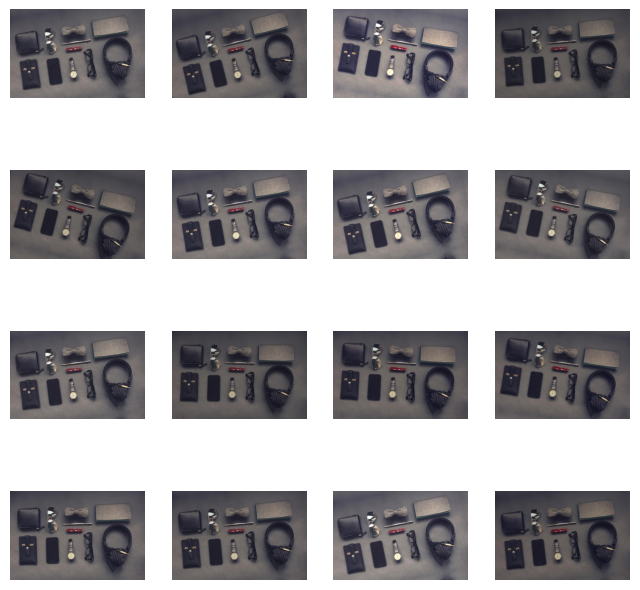

In [6]:
pic_grid(non_sem_tfs)

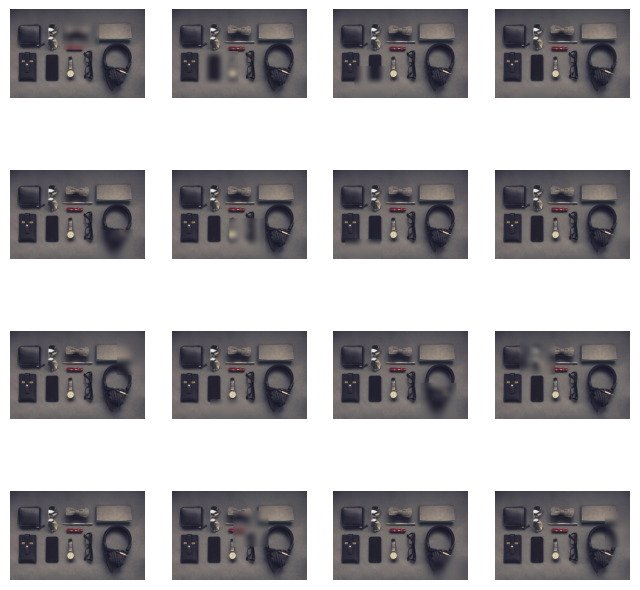

In [7]:
pic_grid(sem_tfs)

# Prompting

In [11]:
prompt = "What color are the glasses?"
non_sem_responses = [prompt_InstructBlip(img, prompt, processor, model) for img in non_sem_paths]
sem_responses = [prompt_InstructBlip(img, prompt, processor, model) for img in sem_paths]

In [12]:
for i, n in enumerate(non_sem_responses): print(i, n)
print('----------------------------------------------')
for i, s in enumerate(sem_responses): print(i, s)

0 silver
1 black
2 silver
3 black
4 silver
5 silver
6 black
7 silver
8 silver
9 black
10 silver
11 silver
12 silver
13 silver
14 silver
15 black
----------------------------------------------
0 black
1 silver
2 silver
3 black
4 silver
5 silver
6 black
7 silver
8 silver
9 silver
10 silver
11 black
12 black
13 silver
14 silver
15 silver


# Analysis

In [13]:
non_sem_diffs = pairwise_diff(non_sem_responses)
sem_diffs = pairwise_diff(sem_responses)
non_sem_var = np.mean(non_sem_diffs, ddof=1)
sem_var = np.mean(sem_diffs, ddof=1)

print('Variance score on Semantically Equivalent Images:', 1000 * non_sem_var)
print('Variance score on Semantically Inequivalent Images:', 1000 * sem_var)

Variance score on Semantically Equivalent Images: 249.302649930265
Variance score on Semantically Inequivalent Images: 249.302649930265
